Reading the data:

In [1]:
import warnings

In [4]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving datafile.xlsx to datafile.xlsx


In [7]:
import pandas as pd
from scipy.io import arff
import numpy as np
df=pd.read_excel('datafile.xlsx')
print(df.dtypes)

Operator               object
In Out Travelling      object
Network Type           object
Rating                  int64
Call Drop Category     object
Latitude              float64
Longitude             float64
State Name             object
dtype: object


In [8]:
df.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,5,Satisfactory,19.871658,75.542397,Maharashtra
1,BSNL,Indoor,3G,1,Call Dropped,16.437764,80.997508,Andhra Pradesh
2,Vodafone,Indoor,4G,1,Poor Voice Quality,13.049329,80.221406,Tamil Nadu
3,Vodafone,Indoor,4G,5,Satisfactory,13.049329,80.221406,Tamil Nadu
4,RJio,Indoor,4G,1,Call Dropped,30.694757,77.428422,Himachal Pradesh


In [10]:
df.shape
# before, the dataset just has about 9k tuples. now, it has been added with more data from other months. total tuples are 52272.

(52272, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52272 entries, 0 to 52271
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Operator            52272 non-null  object 
 1   In Out Travelling   52272 non-null  object 
 2   Network Type        52272 non-null  object 
 3   Rating              52272 non-null  int64  
 4   Call Drop Category  52272 non-null  object 
 5   Latitude            52272 non-null  float64
 6   Longitude           52272 non-null  float64
 7   State Name          52272 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.2+ MB


In [13]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,Rating,Latitude,Longitude
count,52272.000000,52272.000000,52272.000000
mean,3.692436,21.128263,78.870258
std,1.545830,5.625647,4.962316
min,1.000000,8.176694,69.321327
10%,1.000000,12.946637,72.936936
25%,3.000000,17.646662,75.798474
50%,4.000000,22.118275,77.581656
75%,5.000000,25.674544,81.017961
90%,5.000000,28.586957,87.953481
99%,5.000000,31.606865,92.720875


Data Cleaning:

In [17]:
df.isnull().sum()
# this is to check if there are any NAs in the dataframe.

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
Latitude              0
Longitude             0
State Name            0
dtype: int64

In [19]:
df['Call Drop Category'].value_counts()

Satisfactory          37513
Poor Voice Quality     9497
Call Dropped           5262
Name: Call Drop Category, dtype: int64

In [20]:
df['Operator'].value_counts()

Airtel      14334
RJio        13970
Idea        10756
Vodafone     8950
BSNL         3471
MTNL          766
Other          25
Name: Operator, dtype: int64

In [21]:
df['In Out Travelling'].value_counts()

Indoor        36023
Outdoor       12113
Travelling     4136
Name: In Out Travelling, dtype: int64

In [22]:
df['Network Type'].value_counts()

4G         35385
Unknown     8523
3G          5623
2G          2741
Name: Network Type, dtype: int64

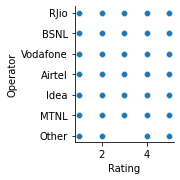

In [23]:
sns.pairplot(y_vars='Operator',x_vars='Rating',data=df)

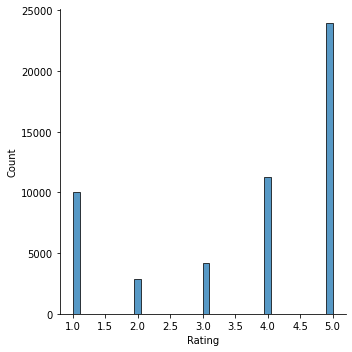

In [25]:
# distribution of rating
sns.displot(df['Rating'])
plt.show()

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.



**Data Visulaization:**

In [27]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,Rating,Latitude,Longitude
0,5,19.871658,75.542397
1,1,16.437764,80.997508
2,1,13.049329,80.221406
3,5,13.049329,80.221406
4,1,30.694757,77.428422


<Figure size 2160x2160 with 0 Axes>

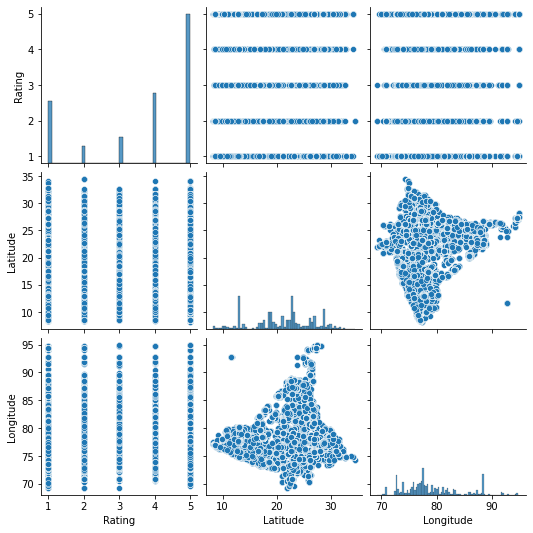

In [28]:
plt.figure(figsize=(30,30))
sns.pairplot(df_numeric)
plt.show()

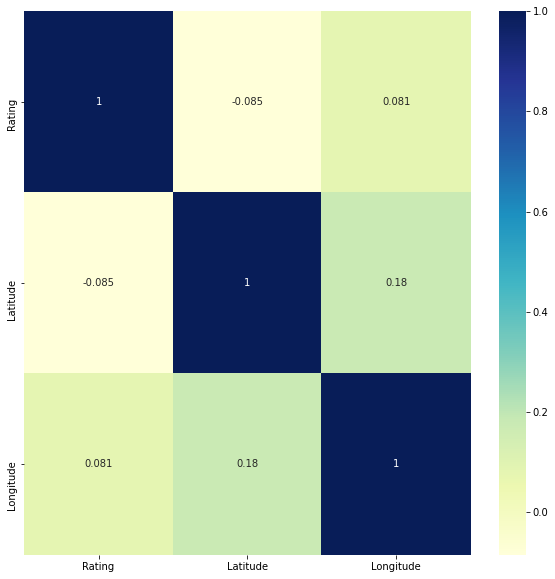

In [29]:
# correlation
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [30]:
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,Operator,In Out Travelling,Network Type,Call Drop Category,State Name
0,RJio,Indoor,4G,Satisfactory,Maharashtra
1,BSNL,Indoor,3G,Call Dropped,Andhra Pradesh
2,Vodafone,Indoor,4G,Poor Voice Quality,Tamil Nadu
3,Vodafone,Indoor,4G,Satisfactory,Tamil Nadu
4,RJio,Indoor,4G,Call Dropped,Himachal Pradesh


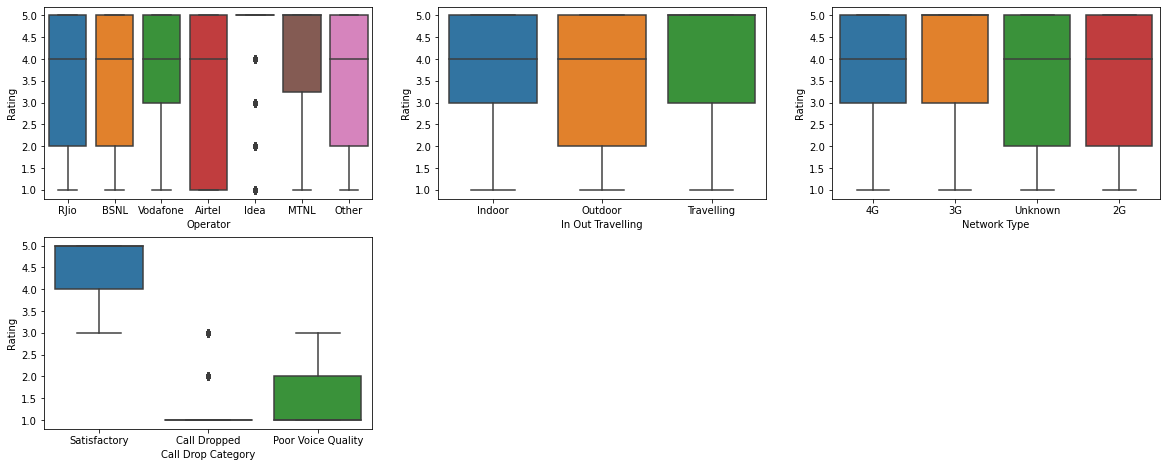

In [33]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Operator', y = 'Rating', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'In Out Travelling', y = 'Rating', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Network Type', y = 'Rating', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Call Drop Category', y = 'Rating', data = df)

1. From the price boxplot it is clear that Network Type with 4G in the dataset has the highest overall rating.
2. Call Dropped has the lowest Rating compared to other Call Drop Categories.
3. The median rating of Indoor is the same as that of Outdoor.
4. Operator "Rjio" and "BSNL" are almost equally rated. There are however some outliers.
 



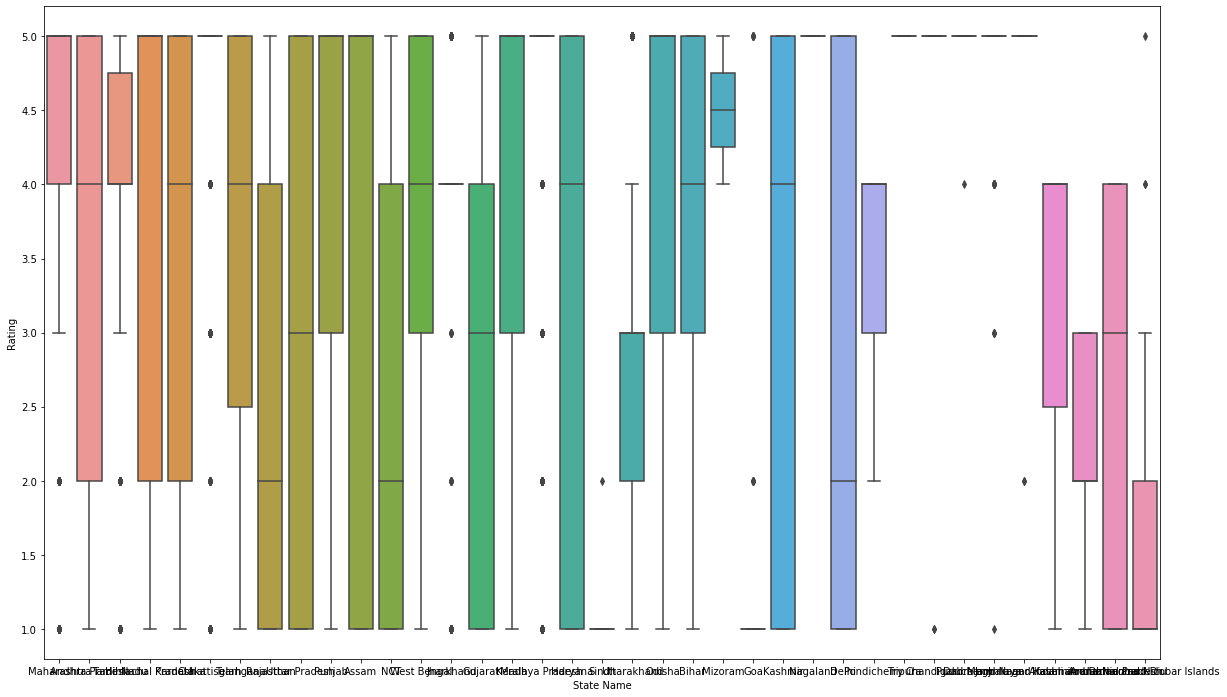

In [34]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'State Name', y = 'Rating', data = df)

1. Mizoram state has the highest median rating in the dataset. 

**Data preparation:**


In [40]:
#creating dummies
df_dummies = pd.get_dummies(categorical_cols, drop_first = True)
df_dummies.head()

,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_Other,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory,State Name_Andaman and Nicobar Islands,State Name_Andhra Pradesh,State Name_Arunachal Pradesh,State Name_Assam,State Name_Bihar,State Name_Chandigarh,State Name_Chhattisgarh,State Name_Dadra and Nagar Haveli and Daman and Diu,State Name_Delhi,State Name_Goa,State Name_Gujarat,State Name_Haryana,State Name_Himachal Pradesh,State Name_Jammu and Kashmir,State Name_Jharkhand,State Name_Karnataka,State Name_Kashmir,State Name_Kerala,State Name_Madhya Pradesh,State Name_Maharashtra,State Name_Meghalaya,State Name_Mizoram,State Name_NCT,State Name_Nagaland,State Name_Odisha,State Name_Pondicherry,State Name_Puducherry,State Name_Punjab,State Name_Rajasthan,State Name_Sindh,State Name_Tamil Nadu,State Name_Telangana,State Name_Tripura,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
rating_df=pd.concat([df,df_dummies],axis=1)

In [42]:
rating_df=rating_df.drop(['Operator','In Out Travelling','Network Type','Call Drop Category','State Name'],axis=1)

In [43]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52272 entries, 0 to 52271
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Rating                                               52272 non-null  int64  
 1   Latitude                                             52272 non-null  float64
 2   Longitude                                            52272 non-null  float64
 3   Operator_BSNL                                        52272 non-null  uint8  
 4   Operator_Idea                                        52272 non-null  uint8  
 5   Operator_MTNL                                        52272 non-null  uint8  
 6   Operator_Other                                       52272 non-null  uint8  
 7   Operator_RJio                                        52272 non-null  uint8  
 8   Operator_Vodafone                                    52272 non-nul

In [44]:
rating_df

,Rating,Latitude,Longitude,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_Other,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory,State Name_Andaman and Nicobar Islands,State Name_Andhra Pradesh,State Name_Arunachal Pradesh,State Name_Assam,State Name_Bihar,State Name_Chandigarh,State Name_Chhattisgarh,State Name_Dadra and Nagar Haveli and Daman and Diu,State Name_Delhi,State Name_Goa,State Name_Gujarat,State Name_Haryana,State Name_Himachal Pradesh,State Name_Jammu and Kashmir,State Name_Jharkhand,State Name_Karnataka,State Name_Kashmir,State Name_Kerala,State Name_Madhya Pradesh,State Name_Maharashtra,State Name_Meghalaya,State Name_Mizoram,State Name_NCT,State Name_Nagaland,State Name_Odisha,State Name_Pondicherry,State Name_Puducherry,State Name_Punjab,State Name_Rajasthan,State Name_Sindh,State Name_Tamil Nadu,State Name_Telangana,State Name_Tripura,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
0,5,19.871658,75.542397,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,16.437764,80.997508,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,13.049329,80.221406,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,13.049329,80.221406,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,30.694757,77.428422,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52267,1,21.239392,81.362753,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52268,1,21.239392,81.362753,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52269,3,25.199455,85.525335,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52270,3,25.199455,85.525335,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Spliting the data into test and train**

In [45]:
df_train, df_test = train_test_split(rating_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
df_train.shape


(36590, 52)

In [47]:
df_test.shape


(15682, 52)

**Model Building**

In [48]:
import warnings

In [49]:
y_train = df_train.pop('Rating')
X_train = df_train

**Model building using RFE**

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Latitude', False, 41),
 ('Longitude', False, 38),
 ('Operator_BSNL', False, 37),
 ('Operator_Idea', False, 29),
 ('Operator_MTNL', False, 28),
 ('Operator_Other', False, 32),
 ('Operator_RJio', False, 30),
 ('Operator_Vodafone', False, 33),
 ('In Out Travelling_Outdoor', False, 40),
 ('In Out Travelling_Travelling', False, 39),
 ('Network Type_3G', False, 36),
 ('Network Type_4G', False, 34),
 ('Network Type_Unknown', False, 35),
 ('Call Drop Category_Poor Voice Quality', False, 26),
 ('Call Drop Category_Satisfactory', True, 1),
 ('State Name_Andaman and Nicobar Islands', False, 17),
 ('State Name_Andhra Pradesh', False, 22),
 ('State Name_Arunachal Pradesh', False, 3),
 ('State Name_Assam', False, 7),
 ('State Name_Bihar', False, 16),
 ('State Name_Chandigarh', True, 1),
 ('State Name_Chhattisgarh', True, 1),
 ('State Name_Dadra and Nagar Haveli and Daman and Diu', False, 27),
 ('State Name_Delhi', False, 15),
 ('State Name_Goa', False, 23),
 ('State Name_Gujarat', False, 13),
 ('

In [52]:
cols = X_train.columns[rfe.support_]
cols

Index(['Call Drop Category_Satisfactory', 'State Name_Chandigarh',
       'State Name_Chhattisgarh', 'State Name_Himachal Pradesh',
       'State Name_Jammu and Kashmir', 'State Name_Kerala',
       'State Name_Madhya Pradesh', 'State Name_Meghalaya',
       'State Name_Nagaland', 'State Name_Puducherry'],
      dtype='object')

**Model 1:**

In [53]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [54]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.912e+04
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:25:36   Log-Likelihood:                -34401.
No. Observations:               36590   AIC:                         6.882e+04
Df Residuals:                   36579   BIC:                         6.892e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [55]:

#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,State Name_Meghalaya,1.01
1,State Name_Chandigarh,1.00
3,State Name_Himachal Pradesh,1.00
4,State Name_Jammu and Kashmir,1.00
8,State Name_Nagaland,1.00
9,State Name_Puducherry,1.00
5,State Name_Kerala,0.13
2,State Name_Chhattisgarh,0.08
6,State Name_Madhya Pradesh,0.07
0,Call Drop Category_Satisfactory,0.01


**Residual analysis:**

In [56]:
y_train_pred = lr_1.predict(X1_sm)
y_train_pred.head()

32093    1.418473
22960    4.782841
29302    4.782841
39727    4.491982
49789    4.491982
dtype: float64

In [57]:
Residual = y_train- y_train_pred


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


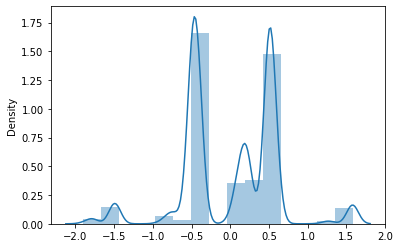

In [58]:
sns.distplot(Residual, bins =15)


**Making Predictions:**

In [59]:
y_test = df_test.pop('Rating')
X_test = df_test

In [61]:
final_cols = X1.columns

In [62]:
X_test_model= X_test[final_cols]
X_test_model.head()

,Call Drop Category_Satisfactory,State Name_Chandigarh,State Name_Chhattisgarh,State Name_Himachal Pradesh,State Name_Jammu and Kashmir,State Name_Kerala,State Name_Madhya Pradesh,State Name_Meghalaya,State Name_Nagaland,State Name_Puducherry
50808,1,0,0,0,0,0,0,0,0,0
33535,1,0,0,0,0,0,0,0,0,0
17024,0,0,0,0,0,0,0,0,0,0
30740,1,0,0,0,0,0,0,0,0,0
46910,0,0,0,0,0,0,0,0,0,0


In [63]:
X_test_sm = sm.add_constant(X_test_model)

In [64]:
y_pred = lr_1.predict(X_test_sm)

In [65]:
y_pred.head()

50808    4.491982
33535    4.491982
17024    1.418473
30740    4.491982
46910    1.418473
dtype: float64

Text(0, 0.5, 'y_pred')

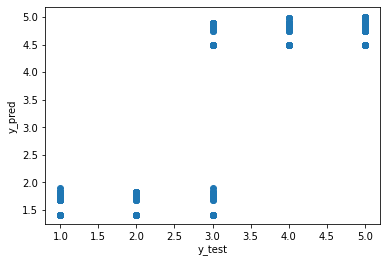

In [66]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [67]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8336529847909588

In [68]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
#tn, fp, fn, tp = 
#x=cf.ravel()
#print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
#print(x)

Confusion Matrix
[[2203   81   37  262  428]
 [ 627  104   29   34   63]
 [ 484   10  133  200  494]
 [   0    0   10 1906 1424]
 [   0    0   38 1313 5802]]


In [70]:
cnf_matrix=cf

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [71]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))
# Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. the first cell (0.66 is calculated from 262/(262+97+40+0+0))

              precision    recall  f1-score   support

           1       0.66      0.73      0.70      3011
           2       0.53      0.12      0.20       857
           3       0.54      0.10      0.17      1321
           4       0.51      0.57      0.54      3340
           5       0.71      0.81      0.76      7153

    accuracy                           0.65     15682
   macro avg       0.59      0.47      0.47     15682
weighted avg       0.63      0.65      0.62     15682

